## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("Data/data_saudi_used_cars.csv")

In [3]:
df.shape

(5624, 11)

In [4]:
df.head(2)

Type  Region    Make  Gear_Type Origin   Options  Year  Engine_Size  \
0  Corolla    Abha  Toyota     Manual  Saudi  Standard  2013          1.4   
1    Yukon  Riyadh     GMC  Automatic  Saudi      Full  2014          8.0   

   Mileage  Negotiable   Price  
0   421000        True       0  
1    80000       False  120000

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [5]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, Mileage, Negotiable, Price]
Index: []

In [6]:
# Completeness
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [7]:
# Accurecy types
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [8]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']
numeric_features = ['Year', 'Engine_Size', 'Mileage']

In [9]:
for i in categorical_features:
    print (df[i].value_counts())

Type
Land Cruiser    269
Camry           233
Hilux           207
Accent          174
Yukon           162
               ... 
Nativa            1
360               1
GC7               1
CT5               1
S8                1
Name: count, Length: 347, dtype: int64
Region
Riyadh            2270
Dammam             924
Jeddah             732
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: count, dtype: int64
Make
Toyota          1430
Hyundai          668
Ford             530
Chevrolet     

In [10]:
df = df[df['Year']>=2000]

In [11]:
# Calculate the frequency of each 'Type'
type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [12]:
df.shape

(5364, 11)

In [13]:
# Calculate the frequency of each 'Make'
make_counts = df['Make'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [14]:
df.shape

(5364, 11)

In [15]:
#df[df['Type']=='Other']

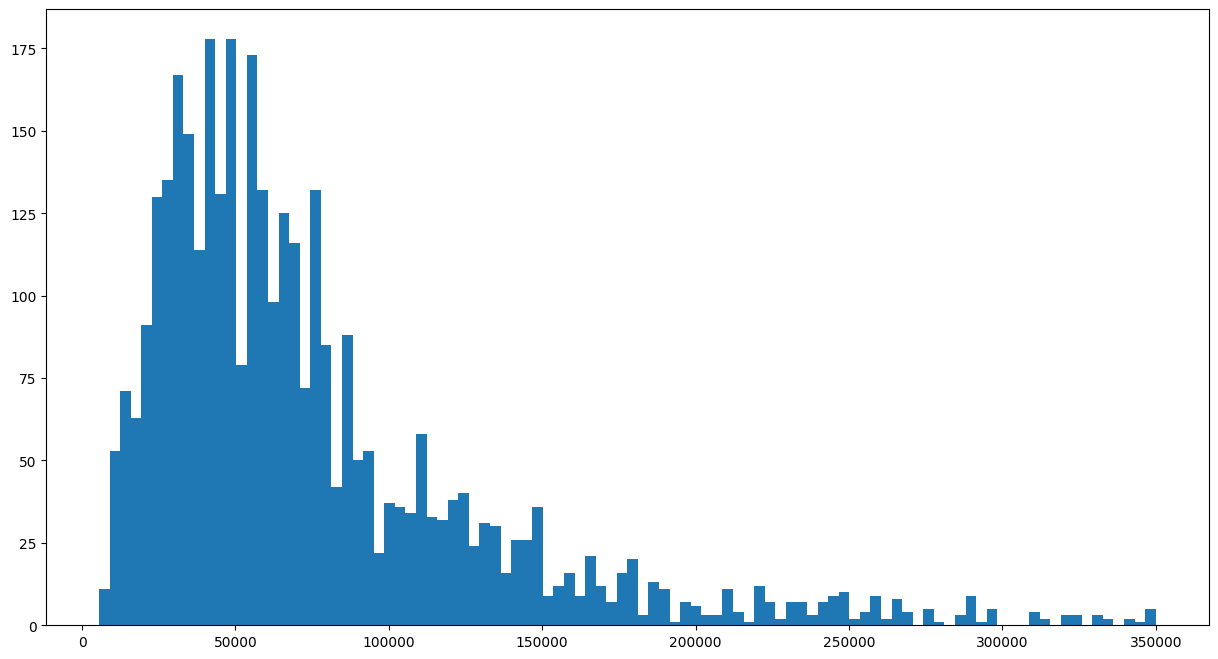

In [16]:
plt.figure(figsize=(15,8))
# plt.boxplot(df['Price']);
plt.hist(df[(df['Price']<=350000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [17]:
df = df[(df['Price']<=350000) & (df['Price']>=5000)]

In [18]:
df.shape

(3566, 11)

In [19]:
#df[df['Mileage']<1000]

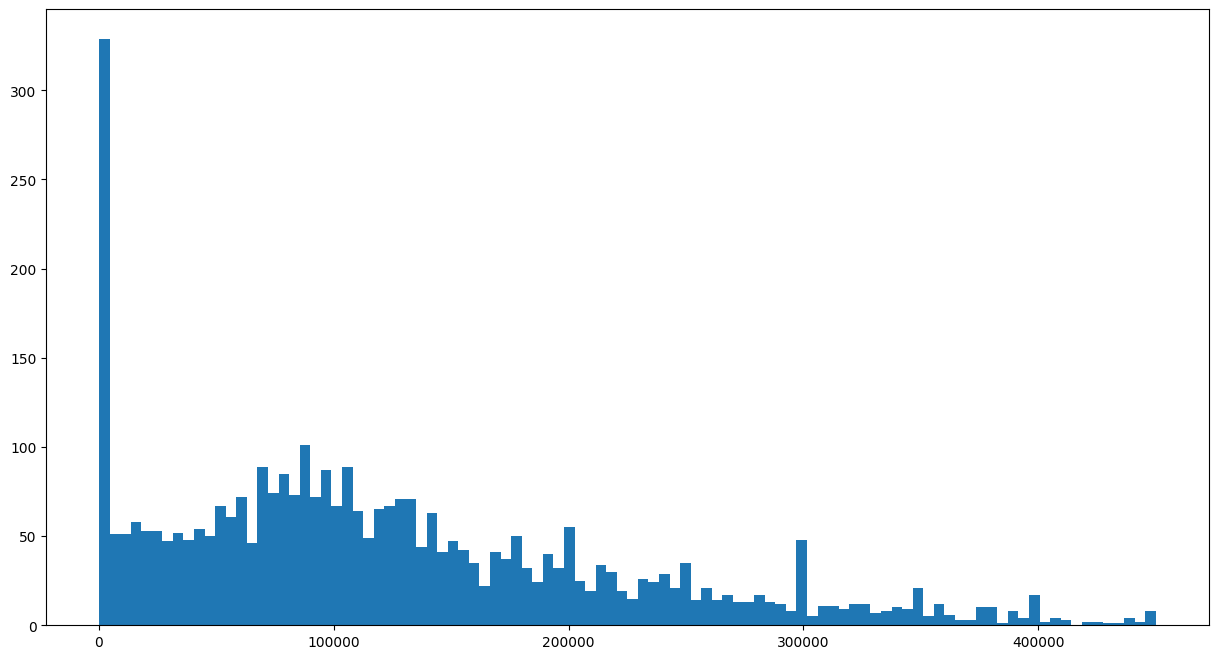

In [20]:
plt.figure(figsize=(15,8))
#plt.boxplot(df['Mileage']);
plt.hist(df[df['Mileage']<=450000]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [21]:
df = df[df['Mileage']<=450000]
df.shape

(3511, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [22]:
df.head(2)

Type  Region        Make  Gear_Type       Origin Options  Year  \
1        Yukon  Riyadh         GMC  Automatic        Saudi    Full  2014   
2  Range Rover  Riyadh  Land Rover  Automatic  Gulf Arabic    Full  2015   

   Engine_Size  Mileage  Negotiable   Price  
1          8.0    80000       False  120000  
2          5.0   140000       False  260000

In [23]:
categorical_features

['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

In [24]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [25]:
df.shape

(3511, 325)

In [26]:
df.head(2)

Year  Engine_Size  Mileage  Negotiable   Price  Type_3  Type_300  \
1  2014          8.0    80000       False  120000   False     False   
2  2015          5.0   140000       False  260000   False     False   

   Type_3008  Type_301  Type_5  ...  Make_Zhengzhou  Gear_Type_Automatic  \
1      False     False   False  ...           False                 True   
2      False     False   False  ...           False                 True   

   Gear_Type_Manual  Origin_Gulf Arabic  Origin_Other  Origin_Saudi  \
1             False               False         False          True   
2             False                True         False         False   

   Origin_Unknown  Options_Full  Options_Semi Full  Options_Standard  
1           False          True              False             False  
2           False          True              False             False  

[2 rows x 325 columns]

#### 3. Feature selection

In [27]:
# sns.heatmap(df.corr(), annot=True);

In [28]:
correlation = df.corr()
print(correlation['Price'].sort_values(ascending=False))

Price               1.000000
Year                0.383150
Options_Full        0.335431
Engine_Size         0.327441
Make_Mercedes       0.298269
                      ...   
Origin_Saudi       -0.181963
Make_Hyundai       -0.206750
Options_Standard   -0.278682
Mileage            -0.301282
Negotiable               NaN
Name: Price, Length: 325, dtype: float64


In [29]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Price']) > threshold]['Price'].index
selected_features

Index(['Year', 'Engine_Size', 'Mileage', 'Price', 'Type_Land Cruiser',
       'Type_Range Rover', 'Make_Hyundai', 'Make_Land Rover', 'Make_Lexus',
       'Make_Mercedes', 'Options_Full', 'Options_Standard'],
      dtype='object')

In [30]:
selected_features = ['Year', 'Engine_Size', 'Mileage',
                     'Price', 
                     'Make_Hyundai', 'Make_Land Rover', 'Make_Lexus',
                     'Make_Mercedes', 'Origin_Gulf Arabic', 'Options_Full',
                     'Options_Standard']

In [31]:
df = df[selected_features]
df.head()

Year  Engine_Size  Mileage   Price  Make_Hyundai  Make_Land Rover  \
1  2014          8.0    80000  120000         False            False   
2  2015          5.0   140000  260000         False             True   
3  2015          2.4   220000   42000         False            False   
5  2019          2.0    25000   58000         False            False   
6  2012          4.8   189000   85000         False            False   

   Make_Lexus  Make_Mercedes  Origin_Gulf Arabic  Options_Full  \
1       False          False               False          True   
2       False          False                True          True   
3       False          False               False         False   
5       False          False               False         False   
6       False          False               False          True   

   Options_Standard  
1             False  
2             False  
3             False  
5             False  
6             False

#### 4. Prepare train and test data

In [32]:
# Prepare data
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X.shape

(3511, 10)

## Buliding the Model

In [113]:
model = LinearRegression()

In [179]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [223]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [266]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [267]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [268]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [269]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [270]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [271]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

## Test the Model

In [272]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [273]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [274]:
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [275]:
# Best hyperparameter
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_ridge = grid_search.best_estimator_

Best parameters found:  {'alpha': 5}


In [276]:
# Best hyperparameter
print("Best parameters found: ", grid_search_lasso.best_params_)

# Best model
best_ridge = grid_search_lasso.best_estimator_

Best parameters found:  {'alpha': 0}


In [254]:
y_pred_ridge_cv = best_ridge.predict(X_test_scaled)

## Interpretation of the Model

In [170]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Year                28047.411537
Engine_Size         21644.068883
Mileage             -5518.745677
Make_Hyundai        -5766.435869
Make_Land Rover      9341.627853
Make_Lexus           9500.074899
Make_Mercedes       15318.612693
Origin_Gulf Arabic   4135.579640
Options_Full         7877.695884
Options_Standard    -3958.947503

In [171]:
print(model.intercept_) 

75439.30021367458


In [172]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Year                15666.712785
Engine_Size         11768.377186
Mileage              -819.818276
Make_Hyundai           -0.000000
Make_Land Rover       310.392304
Make_Lexus           1345.019596
Make_Mercedes        6208.161788
Origin_Gulf Arabic      0.000000
Options_Full         6047.505697
Options_Standard     -126.771236

In [173]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Year                   6.210401
Engine_Size            5.099538
Mileage               -4.864225
Make_Hyundai          -3.168709
Make_Land Rover        3.200475
Make_Lexus             3.602833
Make_Mercedes          4.692930
Origin_Gulf Arabic     3.119400
Options_Full           5.187710
Options_Standard      -4.421973

In [222]:
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Year                27953.625390
Engine_Size         21575.586401
Mileage             -5545.486631
Make_Hyundai        -5764.643186
Make_Land Rover      9323.219227
Make_Lexus           9482.213245
Make_Mercedes       15280.425585
Origin_Gulf Arabic   4136.424842
Options_Full         7871.120398
Options_Standard    -3970.028106

## Evaluating the Model 

1. Mean Square Error

In [52]:
y_base = [y_train.mean()] * len(y_test)

In [60]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 3525053139.6218147


In [48]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 1291203369.7082233
Mean Squared Error for testing: 1291014311.7357974


2. Mean Absolute Error

In [54]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 42200.97317509818


In [55]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 24397.66499302171
Mean Absolute Error for testing: 25186.715154450434


3. Root Mean Squared Error

In [61]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 59372.157949848974


In [62]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 35933.31837874458
Root Mean Squared Error for testing: 35930.687604550476


4. R Square

In [63]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.597025797763749
R Square for testing: 0.6333064542453376


#### Predictions vs. Real Values

In [39]:
predictions = model.predict(X_test_scaled)
#predictions

In [40]:
Real_Values = np.array(y_test)
#Real_Values

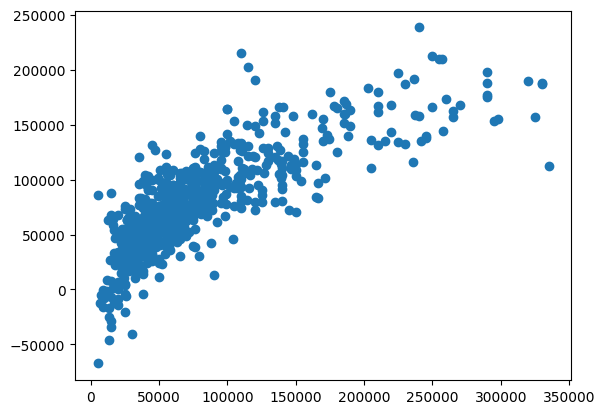

In [41]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

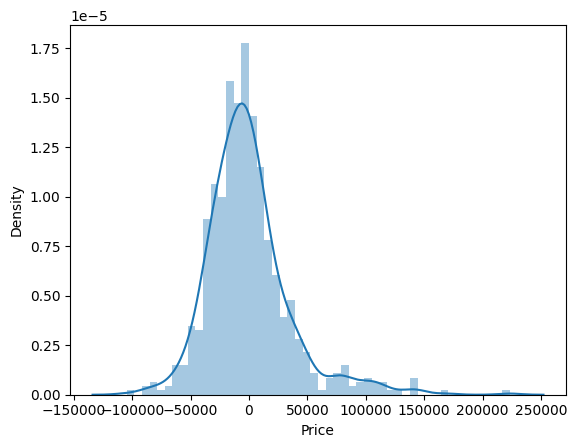

In [42]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution